# 음식물쓰레기 Data

In [65]:
import pandas as pd
df1 = pd.read_csv('01_음식물쓰레기_FOOD_WASTE.CSV.csv', encoding='cp949')
df1.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317


### 1. 지불금액=0 이슈

In [66]:
# 1kg에 30원 맞을까? 네 맞는듯~
df1['em_kg'] = df1['em_g'].apply(lambda x: x/1000) # g -> kg
df1['pay_amt_30'] = df1['em_kg']*30 # 1kg당 30원
df1_ = df1[['pay_amt', 'pay_amt_30']]
df1_.head()

,pay_amt,pay_amt_30
0,464,465.0
1,1787,1794.0
2,758,760.5
3,898,900.0
4,1317,1321.5


In [67]:
# 지불금액이 0인 데이터는 총 1675개
df1[df1['pay_amt']==0] 

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt,em_kg,pay_amt_30
11983,2018-01-09,서귀포시,50130310,안덕면,W6Y330,2,0,0,0.00,0.0
46609,2018-02-02,서귀포시,50130310,안덕면,W6Y447,15,0,0,0.00,0.0
52294,2018-02-06,서귀포시,50130250,대정읍,W6Y461,1,0,0,0.00,0.0
55156,2018-02-08,서귀포시,50130250,대정읍,W6Y461,1,0,0,0.00,0.0
60902,2018-02-12,서귀포시,50130310,안덕면,W6Y444,2,0,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
2206832,2021-06-28,제주시,50110250,한림읍,W6X1A6,1,0,0,0.00,0.0
2207990,2021-06-29,서귀포시,50130310,안덕면,W6Y443,7,8350,0,8.35,250.5
2210445,2021-06-30,서귀포시,50130610,중문동,W6Y238,1,0,0,0.00,0.0
2210829,2021-06-30,서귀포시,50130310,안덕면,W6Y443,9,18750,0,18.75,562.5


In [68]:
# 그 중 배출량도 0인게 949개 -> 즉 얘는 지불금액이 0인게 타당
df1[(df1['em_g']==0) & (df1['pay_amt']==0)]

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt,em_kg,pay_amt_30
11983,2018-01-09,서귀포시,50130310,안덕면,W6Y330,2,0,0,0.0,0.0
46609,2018-02-02,서귀포시,50130310,안덕면,W6Y447,15,0,0,0.0,0.0
52294,2018-02-06,서귀포시,50130250,대정읍,W6Y461,1,0,0,0.0,0.0
55156,2018-02-08,서귀포시,50130250,대정읍,W6Y461,1,0,0,0.0,0.0
60902,2018-02-12,서귀포시,50130310,안덕면,W6Y444,2,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2206347,2021-06-28,서귀포시,50130610,중문동,W6Y223,5,0,0,0.0,0.0
2206480,2021-06-28,제주시,50110310,한경면,W6X2B7,1,0,0,0.0,0.0
2206832,2021-06-28,제주시,50110250,한림읍,W6X1A6,1,0,0,0.0,0.0
2210445,2021-06-30,서귀포시,50130610,중문동,W6Y238,1,0,0,0.0,0.0


In [69]:
# 문제는 나머지 726개
df1[(df1['em_g']!=0) & (df1['pay_amt']==0)]

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt,em_kg,pay_amt_30
331712,2018-08-18,서귀포시,50130550,효돈동,W6Y289,22,47700,0,47.70,1431.0
333119,2018-08-19,서귀포시,50130550,효돈동,W6Y289,21,51400,0,51.40,1542.0
356478,2018-09-04,서귀포시,50130550,효돈동,W6Y289,21,64250,0,64.25,1927.5
357946,2018-09-05,서귀포시,50130550,효돈동,W6Y289,16,37750,0,37.75,1132.5
369896,2018-09-13,제주시,50110640,오라동,W6XC9B,5,11000,0,11.00,330.0
...,...,...,...,...,...,...,...,...,...,...
2202683,2021-06-26,서귀포시,50130310,안덕면,W6Y444,1,1700,0,1.70,51.0
2203918,2021-06-27,서귀포시,50130310,안덕면,W6Y443,10,20100,0,20.10,603.0
2205951,2021-06-28,서귀포시,50130310,안덕면,W6Y443,7,13900,0,13.90,417.0
2207990,2021-06-29,서귀포시,50130310,안덕면,W6Y443,7,8350,0,8.35,250.5


In [70]:
# 배출량이 적지도 않음 -> 무단 투기인가?
금액오류 = df1[(df1['em_g']!=0) & (df1['pay_amt']==0)]
금액오류.describe()

,em_cnt,em_g,pay_amt,em_kg,pay_amt_30
count,726.000000,726.000000,726.0,726.000000,726.000000
mean,25.198347,33945.867769,0.0,33.945868,1018.376033
std,93.350828,34089.182582,0.0,34.089183,1022.675477
min,1.000000,200.000000,0.0,0.200000,6.000000
25%,7.000000,13850.000000,0.0,13.850000,415.500000
50%,10.000000,24750.000000,0.0,24.750000,742.500000
75%,16.000000,39837.500000,0.0,39.837500,1195.125000
max,1562.000000,312400.000000,0.0,312.400000,9372.000000


In [71]:
# 필요 없는 칼럼 지움
df1 = df1.drop(['em_kg', 'pay_amt_30'], axis=1)

### 2. 읍면동별 음식물 쓰레기량
* 전반적인 읍면동별 음식물 쓰레기량을 확인하기 위해 시각화
* 시계열 데이터지만 코로나로 인한 특수성이 존재하므로 이를 확인해보기 위해 코로나 전후로 비교
* 코로나 기준: 2020-01-20 전후 - 국내 첫 확진자 발생일 기준 (일단은)
* 1) 전체 기간 sum()/mean()
* 2) 코로나 전 sum()/mean()
* 3) 코로나 후 sum()/mean() 
* 근데 읍면동별 평균 배출량 보는게 더 편한 것 같아서 그냥 최종적으로는 mean으로만 비교함

In [75]:
# datetime 타입 변환
df1['base_date'] = pd.to_datetime(df1['base_date'])

# 코로나 전후 나누기
df1_전 = df1[df1['base_date'] < '2020-01-20']
df1_후 = df1[df1['base_date'] >= '2021-01-20']

In [82]:
# 전체 기간
#읍면동s_전체 = df1.groupby('emd_nm').sum()
읍면동m_전체 = df1.groupby('emd_nm').mean()

# 코로나 전
#읍면동s_전 = df1_전.groupby('emd_nm').sum()
읍면동m_전 = df1_전.groupby('emd_nm').sum()

# 코로나 후
#읍면동s_후 = df1_후.groupby('emd_nm').sum()
읍면동m_후 = df1_후.groupby('emd_nm').sum()

In [87]:
# csv 내보내기 
#읍면동s_전체.to_csv("읍면동s_전체.csv")
읍면동m_전체.to_csv("읍면동m_전체.csv")
#읍면동s_전.to_csv("읍면동s_전.csv") 
읍면동m_전.to_csv("읍면동m_전.csv")
#읍면동s_후.to_csv("읍면동s_후.csv")
읍면동m_후.to_csv("읍면동m_후.csv")

In [90]:
df1['em_g'].describe()

count    2.211445e+06
mean     4.800791e+04
std      5.928571e+04
min      0.000000e+00
25%      1.295000e+04
50%      3.090000e+04
75%      6.215000e+04
max      2.520642e+06
Name: em_g, dtype: float64

### 시각화 결과
* 음식물 쓰레기 배출량을 5단계로 나누어 어느 행정동이 많이 나오는지 확인 (1번)
* 또한 코로나 전후 배출량을 비교해 코로나 타격이 큰 행정동/아닌 행정동 확인 (2, 3번)
> 코로나 후 전체적인 배출량이 감소하면서 단계 기준이 촘촘헤짐 -> 구분이 모호해짐 <br>
> __연동/노형동/이도2동__ - 코로나 전후 둘다 많은 배출 -> 관광지인지 아닌지 확인 <br>
> __애월읍/대정읍__ - 코로나 후 상대적으로 배출이 많은 읍면동이 됨 <br>
> 그 외 코로나 후 배출량이 상대적으로 줄은 것으로 보이는 동은 없음 <br>
> __즉, 몇 개의 동을 제외하고는 코로나가 읍면동 별 쓰레기 양상에 크게 영향을 미치지는 않는 듯__ 
* 코로나 후를 코로나 전/후의 단계 구분 기준을 각각 적용하여 코로나의 영향 확인 (3, 4번)
> 코로나로 인해 전체적인 음식물 쓰레기 양이 줄었음을 알 수 있음 <br>
> 관광 도시의 특성 때문일 것으로 예상 <br>

1. 전체 기간 
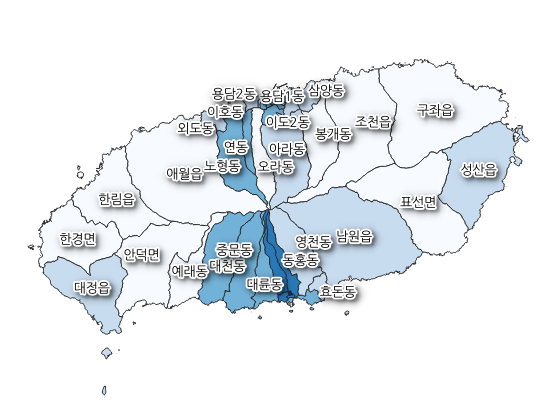

2. 코로나 전
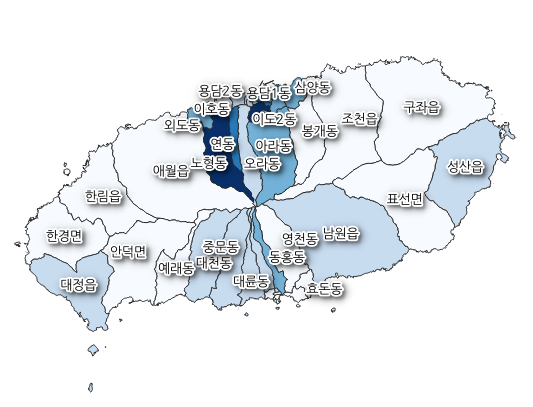

3. 코로나 후 - 후기준
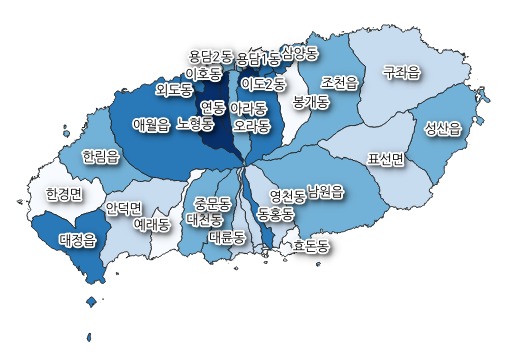

4. 코로나 후 - 전기준
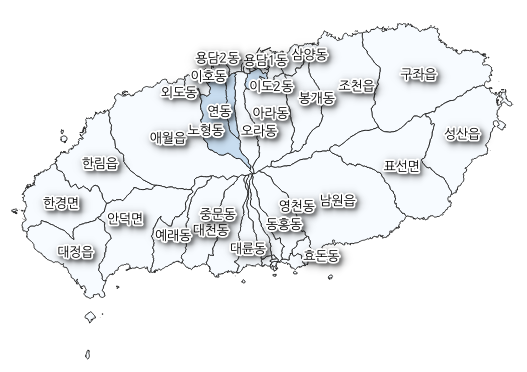

cf. 단계 구분 기준

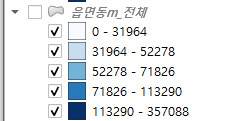

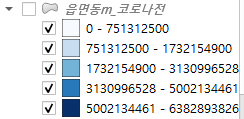

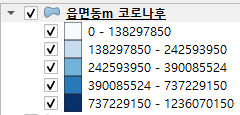

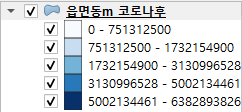

### 3. 알 수 없음
* 시각화하면서 본건데 __음쓰데이터에는 우도면/추자면 데이터가 없었음__
* 그래서 아! 알수없음은 우도면/추자면인가? 했는데 거주인구/카드소비 데이터에는 있음
* 다른 데이터들에도 알수없음은 존재해서 일단 좀더 생각해봐야 될 듯 

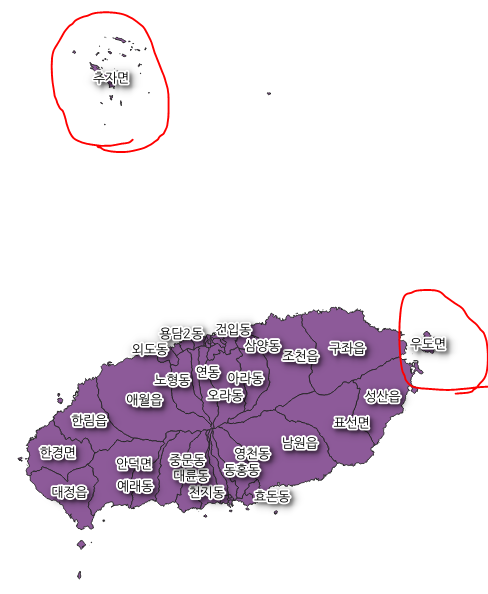

In [108]:
우도면 = df1[df1['emd_nm']=='우도면']
추자면 = df1[df1['emd_nm']=='추자면']
display(우도면)
display(추자면)

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt


,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt


In [121]:
제주행정동 = pd.read_csv('제주행정동_표준_43개.csv', encoding='cp949')
제주행정동 = 제주행정동.rename(columns={'ADM_DR_NM': 'emd_nm'})
확인용 = pd.merge(제주행정동, df1, how='left', on='emd_nm')
# 확인용['emd_nm'].value_counts() -> 우도면/추자면 제외 모든 행정동 일치 확인

# 거주인구 Data
* 유동인구 파트에 따라서 쓰임새가 달라질 것 같아서 낼 다시 생각해봄
* 근데 암튼 무조건 쓸 데이터

In [125]:
import pandas as pd
df5 = pd.read_csv('03_거주인구_RESIDENT_POP.CSV.csv', encoding='cp949')
df5.head()

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797
2,2018,1,제주시,50110256,구좌읍,남성,7965,368,8333
3,2018,1,제주시,50110256,구좌읍,여성,7609,184,7793
4,2018,1,서귀포시,50130253,남원읍,남성,9806,428,10234


# 카드소비 Data
* goal: 가정에서 배출되는 음식물 쓰레기량 예측
* 카드 소비 카테고리 기준을 찾아볼랬는데 아무리 봐도 없어서 그냥 우리가 상식적으로 생각했을 때 가정과 관련된 분류만 골라서 쓰는게 나을 것 같음...
* 즉, __마트/슈퍼마켓, 식품, 패스트푸드, 간식, 농축수산물, 배달__이 되지 않을까?
* 특히 이 중에 마트/슈퍼마켓 및 농축수산물이 가장 큰 영향을 미칠 것 같고 패스트푸드는... 사실 집이랑 음식점 결제를 구분할 수 없어서 영향력이 작게 들어가야될 것 같은데 이런걸 가중치로 주면 어떨지?
* 가중치는... 어떻게 줄지 깊게 고민은 안해봤는데 보통 많이 + 무거운 음식물 쓰레기가 나오는 분류군에 더 높게 주는 식으로?

In [124]:
import pandas as pd
df6 = pd.read_csv('04_음식관련 카드소비_CARD_SPENDING.CSV.csv', encoding='cp949')
df6.head()

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674


In [123]:
df6['mct_cat_nm'].value_counts()

마트/슈퍼마켓    57451
한식         57418
식품         56154
패스트푸드      55578
간식         55398
아시아음식      54309
농축수산물      53569
배달         51765
양식         49849
주점및주류판매    40529
부페         12785
Name: mct_cat_nm, dtype: int64